# Assignment A1: Intro to Text Data, Tokenization, and Document Distance

Covering material from Notebooks 2, 3, 4

# Part A: Working with Text Data

In this assignment, we will explore how to load a text classification dataset (AG's news, originally posted [here](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html)), how we can preprocess the data and extract useful information from a real-world dataset. First, we have to download the data; we only download a subset of the data with four classes.

In [1]:
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

--2022-11-29 18:05:04--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: 'train.csv'

train.csv           100%[===================>]  28.10M  4.87MB/s    in 6.4s    

2022-11-29 18:05:12 (4.40 MB/s) - 'train.csv' saved [29470338/29470338]



## Inspect Data

In [2]:
import pandas as pd
df = pd.read_csv("train.csv", header=None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       120000 non-null  int64 
 1   1       120000 non-null  object
 2   2       120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


,0,1,2
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


Let's make the data more human readable by adding a header and replacing labels

In [3]:
df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 

In [4]:
df.head()

,label,title,lead
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [5]:
# TODO implement a new column text which contains the lowercased title and lead
df["text"] = df["title"].str.lower() + " " + df["lead"].str.lower()


In [6]:
# TODO print the number of documents for each label
df['label'].value_counts()

business    30000
sci/tech    30000
sport       30000
world       30000
Name: label, dtype: int64

## Document Length

<AxesSubplot:xlabel='label'>

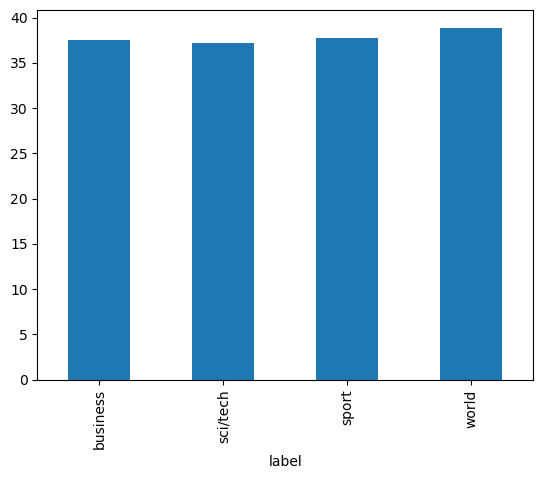

In [7]:
# TODO create a new column with the number of words for each text
# df["num_words"] = df['text'].split().apply(len).value_counts()
# df["num_words"] = df["text"].apply(lambda n: len(n.split()))
df["num_words"] = df["text"].apply(lambda n: len(n.split()))

# TODO plot the average number of words per label 
df.groupby('label')['num_words'].mean().plot(kind='bar')

## Word Frequency 

Let's implement a keyword search (similar to the baker-bloom economic uncertainty) and compute how often some given keywords ("play", "tax", "blackberry", "israel") appear in the different classes in our data

In [8]:
import re
keywords = ["play", "tax", "blackberry", "israel"]
for keyword in keywords:
    #TODO implement a regex pattern
    x = keyword
    pattern = re.compile(x)
    def count_keyword_frequencies(x):
        #TODO implement a function which counts how often a pattern appears in a text
        num_occurrences = len(pattern.findall(x))
        return num_occurrences
    # Now, we can print how often a keyword appears in the data
    print (df["text"].apply(count_keyword_frequencies).sum())
    # and we want to find out how often the keyword appears withhin each class
    for label in df["label"].unique():
        print ("label:", label,", keyword:", keyword)
        print (df.loc[df['label'] == label]["text"].apply(count_keyword_frequencies).sum())
    print ("*" * 100)

8385
label: business , keyword: play
386
label: sci/tech , keyword: play
1929
label: sport , keyword: play
5666
label: world , keyword: play
404
****************************************************************************************************
1575
label: business , keyword: tax
1214
label: sci/tech , keyword: tax
101
label: sport , keyword: tax
31
label: world , keyword: tax
229
****************************************************************************************************
234
label: business , keyword: blackberry
44
label: sci/tech , keyword: blackberry
190
label: sport , keyword: blackberry
0
label: world , keyword: blackberry
0
****************************************************************************************************
3573
label: business , keyword: israel
25
label: sci/tech , keyword: israel
65
label: sport , keyword: israel
66
label: world , keyword: israel
3417
****************************************************************************************************


As a last exercise, we re-use the fuzzy keyword search implemented above and plot the total number of occurrences of "tax" (and it's variations, e.g. taxation, taxes etc.) for each class in the dataset. Hint: have a look at the [pandas bar plot with group by](https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot)

<AxesSubplot:xlabel='label'>

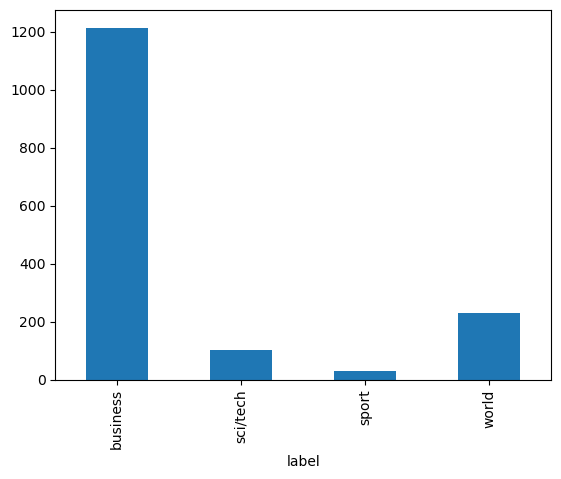

In [9]:
import matplotlib.pyplot as plt

keyword = "tax"
pattern = re.compile(keyword)

def count_keyword_frequencies(x):
    #TODO implement a function which counts the total number of the word "tax" (and other fuzzy matches of tax) appearing in a given text
    num_occurrences = len(pattern.findall(x))
    return num_occurrences

df["counts"] = df["text"].apply(count_keyword_frequencies)
#TODO create a bar plot for the wordcounts of "tax" for each class in the dataset
df.groupby('label')['counts'].sum().plot(kind='bar')

# Part B: Tokenization

## Preprocess Text using spacy

In [11]:
import spacy
dfs = df.sample(200)
nlp = spacy.load('en_core_web_md')

##TODO use spacy to split the documents in the sampled dataframe (dfs) in sentences and tokens
docs = list(nlp.pipe(dfs["lead"]))

##TODO print the first sentence of the first document in your sample
for doc in docs: 
    print(next(doc.sents))
    break

A group of open-source software pioneers, led by Linux developer Linus Torvalds, has issued an appeal to the EU Council to block the legalization of software patents.


In [15]:
##TODO create a new column with tokens in lowercase (x.lower()), without punctuation tokens (x.is_punct) nor stopwords (x.is_stop)
dfs["text_clean"] = [[chunk.text.lower() for chunk in doc if not 
                      (chunk.is_punct or chunk.is_stop)] for doc in docs]
dfs["text_clean"] = dfs["text_clean"].str.join(" ")

##TODO print the tokens (x.lemma_) and the tags (x.tag_ ) of the first sentence of the first document (doc.sents)
for doc in docs: 
    for sent in doc.sents:
        for token in sent:
            print(token.lemma_, token.tag_)
        break
    break

a DT
group NN
of IN
open JJ
- HYPH
source NN
software NN
pioneer NNS
, ,
lead VBN
by IN
Linux NNP
developer NN
Linus NNP
Torvalds NNP
, ,
have VBZ
issue VBN
an DT
appeal NN
to IN
the DT
EU NNP
Council NNP
to TO
block VB
the DT
legalization NN
of IN
software NN
patent NNS
. .


### Noun Chunks

In [16]:
##TODO print the first 20 noun chuncks in your sample corpus (doc.noun_chunks)
nouns = [[chunk for chunk in doc.noun_chunks] for doc in docs]
nouns = [item for sublist in nouns for item in sublist]
print(nouns[:20])


[A group, open-source software pioneers, Linux developer Linus Torvalds, an appeal, the EU Council, the legalization, software patents, Microsoft, Asian leaders, they, intellectual property rights claims, they, free Linux software, a report, Samsung, the world #39;s leading display maker, Wednesday, it, the first all-angle three-dimensional (3D) display panels, cellphones]


### Named Entities

Let's compute the ratio of named entities starting with a capital letter, e.g. if we have "University of Chicago" as a NE, "University" and "Chicago" are capitalized, "of" is not, thus the ratio is 2/3.

In [17]:
##TODO print the ratio of tokens being part of a named entity span starting with a capital letter (doc.ents)
import numpy as np
named_entities = [doc.ents for doc in docs]

ent_capital = []
for doc in docs:
    for ent in doc.ents:
        ent_capital.append([chunk.text[0].isupper() for chunk in ent])
ent_capital = [item for sublist in ent_capital for item in sublist]
print(np.sum(ent_capital)/len(ent_capital))

0.6610824742268041


In [18]:
##TODO print the ratio of capitalized tokens not being part of a named entity span
non_ent_capital = []
for doc in docs:
    non_ent_capital.append([chunk.text[0].isupper() for chunk in doc 
                            if chunk.ent_type_ == ""])
non_ent_capital = [item for sublist in non_ent_capital for item in sublist]
print(np.sum(non_ent_capital)/len(non_ent_capital))
    

0.055201698513800426


In [19]:
##TODO print the ratio of capitalized tokens not being a named entity and not being the first token in a sentence
# e.g. "The dog barks" = 0; 3 tokens, "The" is capitalized but the starting token of a sentence, no other tokens are capitalized.
non_ent_non_start_capital = []
for doc in docs:
    non_ent_non_start_capital.append([chunk.text[0].isupper() for chunk in doc 
                            if ((chunk.is_sent_start == False) and (chunk.ent_type_ == ""))])
non_ent_non_start_capital = [item for sublist in non_ent_non_start_capital for item in sublist]
print(np.sum(non_ent_non_start_capital)/len(non_ent_non_start_capital))

0.03522149600580973


Give an example of a capitalized token in the data which is neither a named entity nor at the start of a sentence. What could be the reason the token is capitalized (one sentence)?

In [20]:
from itertools import compress
chunks = []
for doc in docs:
    chunks.append([[chunk.text] for chunk in doc 
                            if ((chunk.is_sent_start == False) and (chunk.ent_type_ == ""))])

        
chunks = [item for sublist in chunks for item in sublist]
print(list(compress(chunks, non_ent_non_start_capital))[:20])

# Some are falsly classified and some are just unspecified entities such as Foreign Minister or President. 

[['Linux'], ['President'], ['Dec.12'], ['Chiefs'], ['Oil'], ['SP2'], ['Prince'], ['Wales'], ['CP'], ['DELHI'], ['Prime'], ['Minister'], ['Foreign'], ['Minister'], ['Yahoo\\\\Google'], ['Yahoo'], ['Chancellor'], ['Director'], ['After'], ['Jan.']]


## Term Frequencies

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.01, 
                        max_df=0.9,  
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(2,2))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

##TODO using the whole sample, produce a world cloud with bigrams for each label using tfidf frequencies
for group in df["label"].unique():
    df_label = df.loc[df['label'] == group]
    vecs = tfidf.fit_transform(list(df_label["text"]))
    feature_names = tfidf.get_feature_names()
    dense = vecs.todense()
    print(dense.shape)
    lst1 = dense.tolist()
    df_ = pd.DataFrame(lst1, columns=feature_names)
    df_.T.sum(axis=1)
    Cloud = WordCloud().generate_from_frequencies(df_.T.sum(axis=1))
    Cloud.to_image().show()



/Users/elliotbeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(30000, 56)


/Users/elliotbeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(30000, 35)


/Users/elliotbeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(30000, 26)


/Users/elliotbeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(30000, 40)


## Hash Vectorizer

In [22]:
from sklearn.feature_extraction.text import HashingVectorizer
import numpy as np

hv = HashingVectorizer(n_features=5000, alternate_sign=False)

##TODO print the first 10 features produced by the hash vectorizer
X = hv.fit_transform(list(dfs["text"]))
X = np.array(X.todense())  # type: ignore
print(X[:,:10])


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Supervised Feature Selection

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

##TODO compute the number of words per document (excluding stopwords)
docs = nlp.pipe(dfs["text"])
num_of_words = []
for doc in docs:
    num_of_words_doc = []
    num_of_words_doc.append(len([token for token in doc if not token.is_stop]))
    num_of_words.append(num_of_words_doc)
num_of_words = [item for sublist in num_of_words for item in sublist]    
##TODO get the most predictive features of the number of words per document using first f_class and then chi2
classif = SelectKBest(score_func=f_classif, k=10)
classif.fit(X, num_of_words)
print(classif.get_feature_names_out())
chi2_fit = SelectKBest(score_func=chi2, k=10)
chi2_fit.fit(X, num_of_words)
print(chi2_fit.get_feature_names_out())



['x3912' 'x4126' 'x4278' 'x4314' 'x4394' 'x4425' 'x4519' 'x4544' 'x4672'
 'x4948']
['x785' 'x884' 'x2589' 'x2977' 'x3075' 'x3912' 'x4112' 'x4126' 'x4314'
 'x4519']


/Users/elliotbeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   3    4    7 ... 4996 4998 4999] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/elliotbeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/elliotbeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Are the results different? What could be a reason for this? 

# C. Document Distance

In [24]:

from sklearn.feature_extraction.text import CountVectorizer

##TODO vectorize the pre-processed text using CountVectorizer
import numpy as np
# print(" ".join(dfs.iloc[0,4]))
hv = CountVectorizer()
X = hv.fit_transform(dfs["text_clean"])
X = np.array(X.todense())  # type: ignore
print(X[:,:10])


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Cosine Similarity

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

##TODO compute the cosine similarity for the first 200 snippets and for the first snippet, show the three most similar snippets and their respective cosine similarity scores
similarities = cosine_similarity(X[:200,:], X[0,:].reshape(1,-1))
# ind = np.argpartition(similarities.reshape(1, -1), -3)[-3:]
ind = (-similarities.reshape(1, -1)).argsort()

# only keep top 3
ind = ind[0][:4]

# similarity scores of top three
print(similarities[ind])

# print orignal sentence and the three most similar snippets 
for i in ind:
    print(str(dfs.iloc[i,3]) + "\n")

[[1.        ]
 [0.17320508]
 [0.11858541]
 [0.09759001]]
torvalds, open-source pioneers take on eu patent issue a group of open-source software pioneers, led by linux developer linus torvalds, has issued an appeal to the eu council to block the legalization of software patents.

microsoft 'warns of linux claims' microsoft tells asian leaders that they could face intellectual property rights claims if they use free linux software, a report says.

adobe releases new version of acrobat us software developer adobe systems has released adobe acrobat version 7.0, a family of desktop applications that provides a range of document portability capabilities, including converting documents into the adobe portable document format (pdf).

ibm introduces  #39;world community grid #39;; public invited to donate &lt;b&gt;...&lt;/b&gt; yesterday, a biotech company in australia announced they would be sharing their line of embryonic stem cells to an  quot;open source quot; research community -- for the 

## Clustering

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

##TODO create the clusters found with k-means clustering nd 10 clusters
cluster_10 = KMeans(n_clusters=10).fit(X)
##TODO find the optimal number of clusters in a range from 2 to 50 using the silhouette score
silhouette_scores = []
for i in range(2,50):
    cluster = KMeans(n_clusters=i, random_state=0).fit(X)
    silhouette_scores.append(silhouette_score(X, cluster.labels_))
    
opt_num_cluster = silhouette_scores.index(max(silhouette_scores)) + 2

print("Optimal Number of clusters: " + 
      str(silhouette_scores.index(max(silhouette_scores))+2))
print("Silhouette score: " + 
      str(silhouette_scores[silhouette_scores.index(max(silhouette_scores))]))


Optimal Number of clusters: 5
Silhouette score: 0.08771716146533987


In [66]:
##TODO create the clusters using the opitmal number of clusters obtained before
cluster_opt = KMeans(n_clusters=opt_num_cluster).fit(X)
##TODO compare the documents in cluster "1" under the two specifications, does the cluster look cleaner after having searched for the optimal number of clusters?
print(dfs.loc[cluster_opt.labels_==1, "text"])
print("###############################################")
print(dfs.loc[cluster_10.labels_==1, "text"])


88485     world #39;s first  #39;3d #39; cell display de...
62996     fire sweeps through caracas high-rise a fire b...
87779     2nd round of talks on darfur concludes the sec...
102746    sudan lifts state of emergency in north darfur...
63509     sec investigates part of thomson financial #39...
83926     blair to hold talks with bush in washington br...
61529     wr grace asks to delay reorganization wr grace...
106666    road rage was behind serb 'assassination' scar...
20275     oil ministers to discuss gas project new delhi...
93264     more than 15,000 species said to be facing ext...
28977     u.s. joins new drive for northern ireland deal...
35302     dollar regains some ground lost  tokyo (reuter...
23118     realnetworks sells three million songs through...
3194      update 1: sprint signs \$3 billion wireless pa...
60647     learning 2nd language changes brain anatomy -s...
20502     fleetwood 1q profit sharply higher fleetwood e...
15743     hollinger panel says owners to